<a href="https://colab.research.google.com/github/ARJUNVIJAYMK/ENTRI_PROJECT_SupplyChainManagement-/blob/ARJUNVIJAYMK-patch-1/Supply_Chain_Management_ARJUNVIJAYMKENTRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supply Chain Management Project**

## **OVERVIEW**

A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two
years back. Their higher management has noticed that there is a mismatch in the demand and
supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in
inventory cost and ultimately loss to the company. Hence, the higher management wants to
optimize the supply quantity in each and every warehouse in the entire country.

## **Data Overview**
The dataset includes information about warehouses, managers, regional zones, and various factors affecting the supply chain.
Problem: Mismatch in demand and supply, resulting in inventory costs and losses.
Goal: Build a model using historical data to determine the optimum weight of the product shipped from each warehouse.

## **GOALS**
The objective of this exercise is to build a model, using historical data that will determine an
optimum weight of the product to be shipped each time from the respective warehouse.
1. Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
2. Highlight any trend in data, deep insight, novel steps that you take
3. Highlight next steps and improvements.
4. Apply 5 to 6 machine learning algorithms and evaluate it using Test dataset .

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

## **Load Data**

In [ ]:
#Read the Data
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/supply chain/supply_train.csv")

In [ ]:
df = df.iloc[:, 1:]
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,4779,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,5718,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,4514,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,5829,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [ ]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [ ]:
df.shape

(16620, 24)


# **Data Cleaning**

In [ ]:
# Null check
null_values = df.isnull().sum()
null_values

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [ ]:
df['workers_num'].fillna(df['workers_num'].mean(), inplace=True)

In [ ]:
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].fillna(method='ffill')

In [ ]:
df = df.drop(columns = ['wh_est_year'])

## **Identify missing values**

In [ ]:
null_values=df.isnull().sum()
null_values

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

## **Correlation** and **Data visualization**

<ipython-input-125-9a74f895b233>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


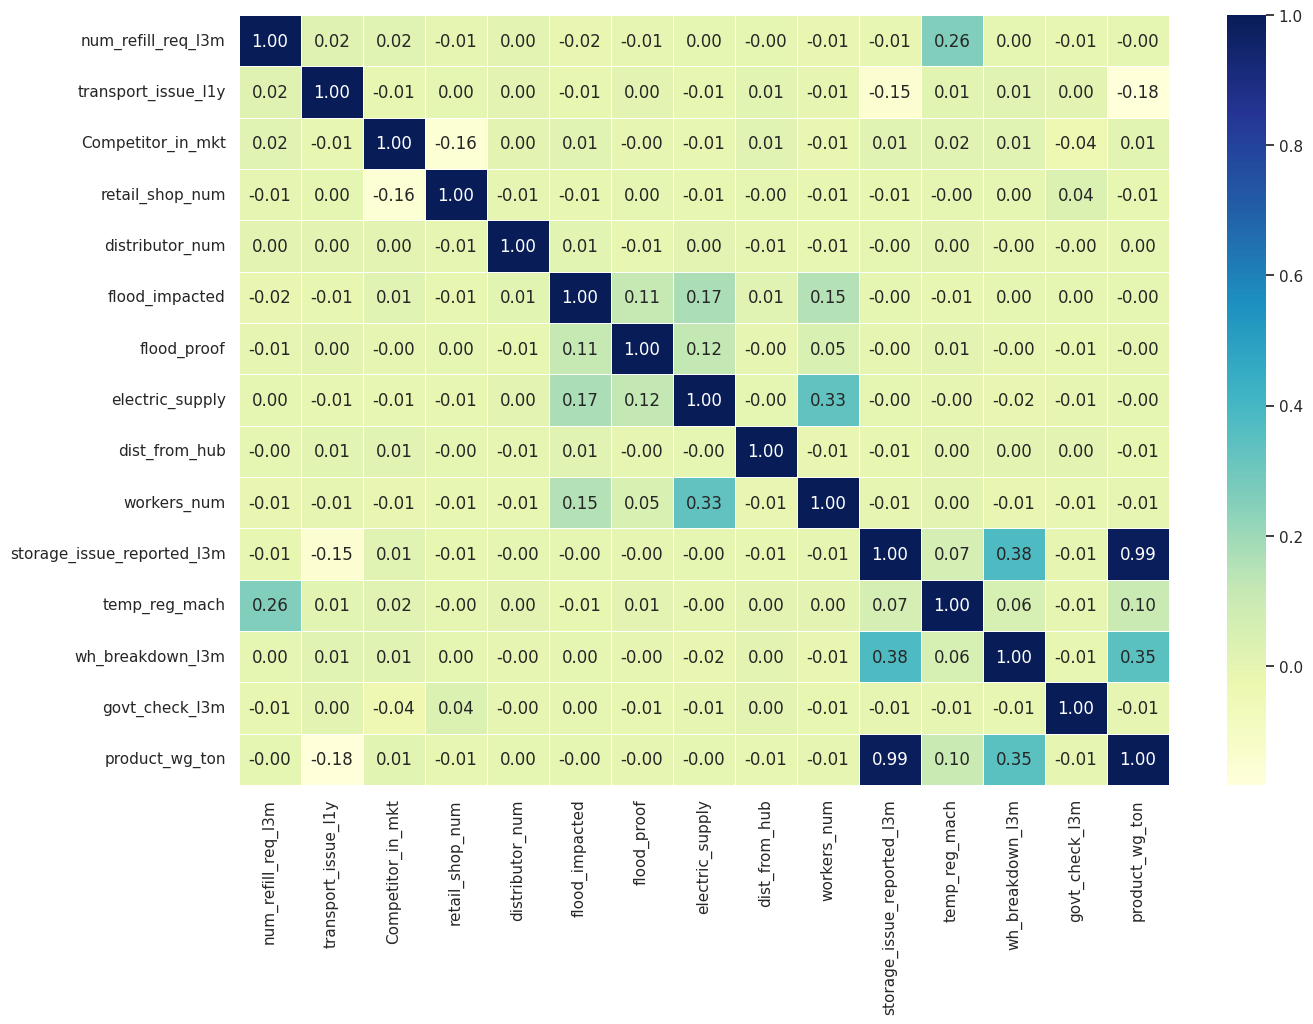

In [ ]:
# Identifying any moderate or strong correlations
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


In [ ]:
top5_values_by_zone = df.groupby('zone')['product_wg_ton'].value_counts().groupby('zone').head(5)
print(top5_values_by_zone)


zone   product_wg_ton
East   9131              2
       20072             2
       25101             2
       27108             2
       29085             2
North  29109             8
       31111             8
       5057              7
       5068              7
       5074              7
South  6057              9
       6081              9
       5098              6
       17095             6
       17119             6
West   6104              9
       5079              7
       7088              7
       31103             7
       31132             7
Name: product_wg_ton, dtype: int64


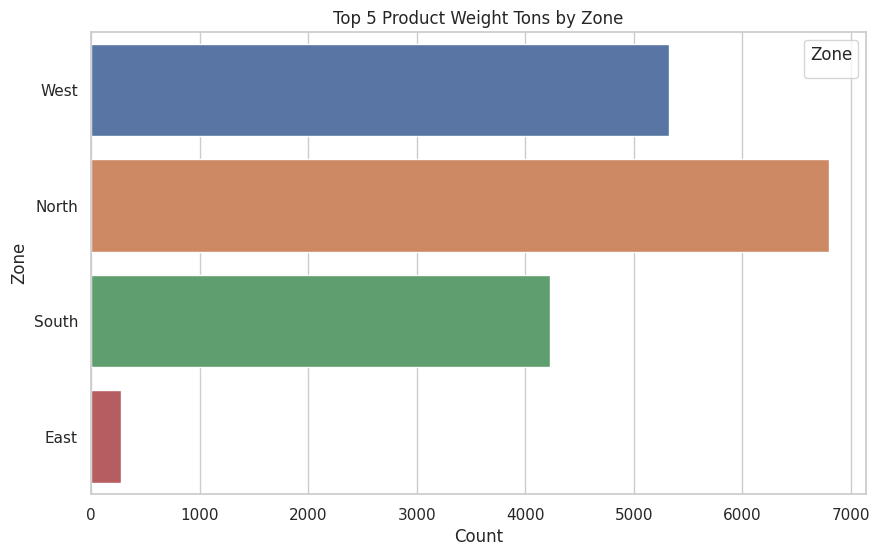

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar chart for each zone with different colors
sns.barplot(x='product_wg_ton', y='zone', data=df, estimator=lambda x: len(x), hue='zone')

plt.title('Top 4 Product Weight Tons by Zone')
plt.xlabel('Count')
plt.ylabel('Zone')
plt.legend(title='Zone')

plt.show()

In [ ]:

# Calculate the sum of 'product_wg_ton' for all zones
total_weight = df['product_wg_ton'].sum()
# Calculate percentages
df['percentage'] = (df['product_wg_ton'] / total_weight) * 100

x=df.groupby('Location_type')['percentage'].sum()
x

Location_type
Rural    90.838077
Urban     9.161923
Name: percentage, dtype: float64

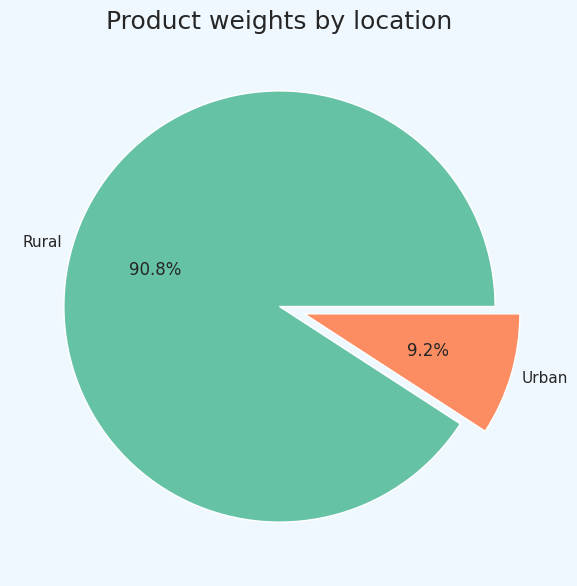

In [ ]:
labels = ['Rural','Urban']
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize=(8, 7), facecolor='aliceblue')
ax.pie(x, labels=labels,
       autopct='%1.1f%%',
       colors=sns.color_palette('Set2'),
       labeldistance=1.05,
       # Add space around only one slice
       explode=[0, 0.12])
plt.title('Product weights by location', fontsize=18)
plt.show()

<ipython-input-130-abf0a9380417>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="WH_regional_zone", palette=colormap, order=order)


Text(0.5, 1.0, 'Wherehouse count by WH_regional_zone')

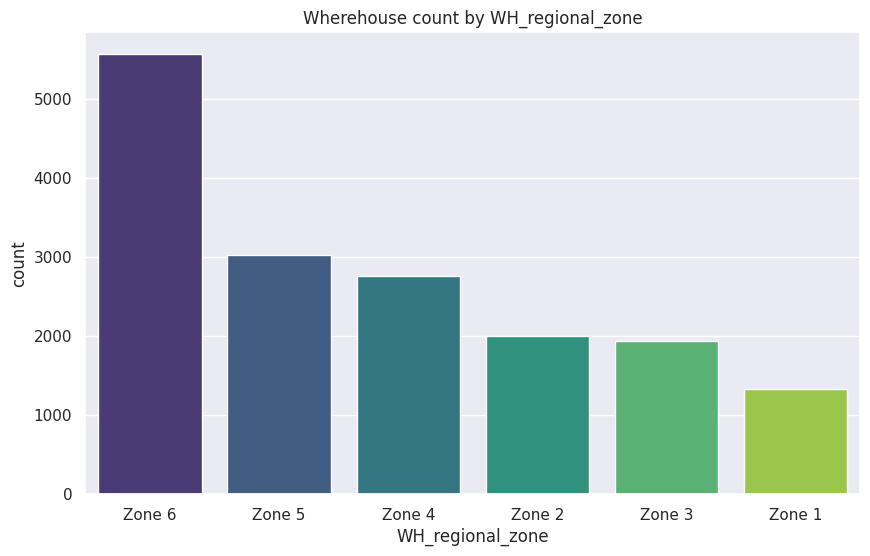

In [ ]:
plt.figure(figsize=(10, 6))

order = df['WH_regional_zone'].value_counts().index

# Create a colormap with a range of colors
colormap = sns.color_palette("viridis", len(order))

sns.countplot(data=df, x="WH_regional_zone", palette=colormap, order=order)
plt.title("Wherehouse count by WH_regional_zone")
# plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

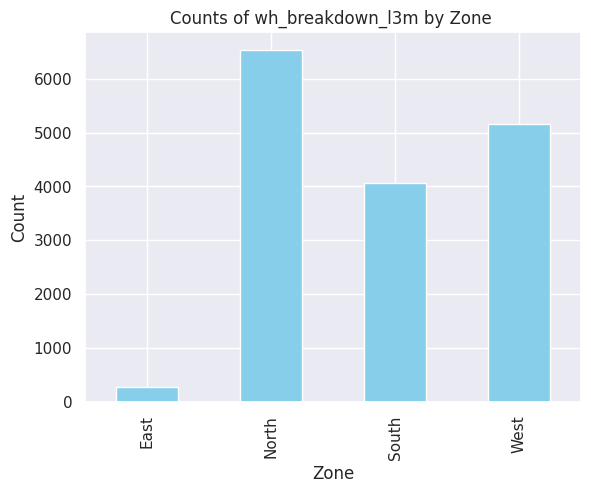

In [ ]:
non_zero_count = df['wh_breakdown_l3m'].value_counts().sum()

# Step 2: Drop Rows with 0 Value in 'wh_breakdown_l3m'
df_filtered = df[df['wh_breakdown_l3m'] != 0]

# Step 3: Plot Counts of 'wh_breakdown_l3m' by Zone
w = df_filtered.groupby('zone')['wh_breakdown_l3m'].count()

# Plot the counts
w.plot(kind='bar', color='skyblue')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.title('Counts of wh_breakdown_l3m by Zone ')
plt.show

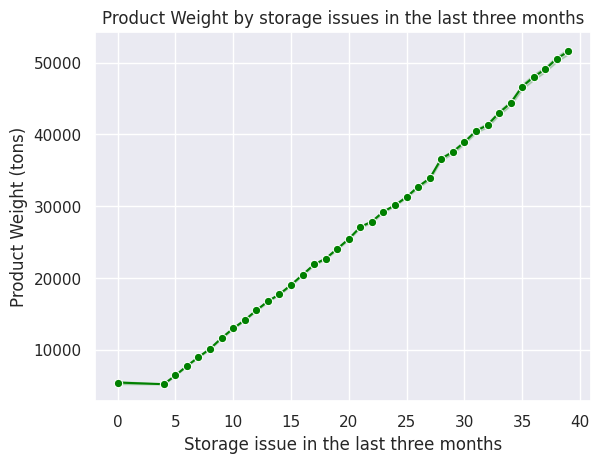

In [ ]:
sns.lineplot(data=df, x='storage_issue_reported_l3m', y='product_wg_ton', color='green', marker='o')
plt.xlabel('Storage issue in the last three months')
plt.ylabel('Product Weight (tons)')
plt.title('Product Weight by storage issues in the last three months')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   WH_Manager_ID                 16620 non-null  object 
 2   Location_type                 16620 non-null  object 
 3   WH_capacity_size              16620 non-null  object 
 4   zone                          16620 non-null  object 
 5   WH_regional_zone              16620 non-null  object 
 6   num_refill_req_l3m            16620 non-null  int64  
 7   transport_issue_l1y           16620 non-null  int64  
 8   Competitor_in_mkt             16620 non-null  int64  
 9   retail_shop_num               16620 non-null  int64  
 10  wh_owner_type                 16620 non-null  object 
 11  distributor_num               16620 non-null  int64  
 12  flood_impacted                16620 non-null  int64  
 13  f

In [ ]:
df = df.drop(columns =['Ware_house_ID','WH_Manager_ID'])

In [ ]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode 'Location_type' column
df['Location_type'] = le.fit_transform(df['Location_type'])

# Encode 'WH_capacity_size' column
df['WH_capacity_size'] = le.fit_transform(df['WH_capacity_size'])

# Encode 'approved_wh_govt_certificate' column
df['approved_wh_govt_certificate'] = le.fit_transform(df['approved_wh_govt_certificate'])

# Encode 'zone' column
df['zone'] = le.fit_transform(df['zone'])

# Encode 'WH_regional_zone' column
df['WH_regional_zone'] = le.fit_transform(df['WH_regional_zone'])

# Encode 'wh_owner_type' column
df['wh_owner_type'] = le.fit_transform(df['wh_owner_type'])

In [ ]:
#Read the Data
df_test= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/supply chain/supply_test.csv")
df_test = df_test.iloc[:, 1:]

In [ ]:
df_test = df_test.drop(columns =['Ware_house_ID','WH_Manager_ID','wh_est_year'])
df_test

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Rural,Large,North,Zone 5,5,0,3,5590,Company Owned,15,...,0,0,156,30.0,24,0,A,2,5,30132
1,Rural,Large,North,Zone 5,5,0,2,5856,Company Owned,40,...,0,1,79,31.0,5,1,C,2,24,6075
2,Rural,Small,North,Zone 6,3,0,3,4803,Rented,40,...,0,1,70,41.0,19,1,A+,5,9,24076
3,Rural,Mid,West,Zone 4,5,2,2,4784,Rented,15,...,0,1,255,33.0,9,1,A+,3,11,13092
4,Urban,Mid,North,Zone 4,6,0,4,3699,Rented,24,...,0,0,205,20.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,Rural,Large,North,Zone 6,8,1,3,5030,Rented,46,...,0,1,203,28.0,22,1,A+,2,4,29138
5525,Rural,Small,South,Zone 6,3,1,3,4320,Rented,60,...,0,0,170,NaN,26,0,C,5,9,33108
5526,Rural,Large,North,Zone 6,7,2,2,5268,Company Owned,64,...,0,0,99,22.0,20,0,B+,6,4,24072
5527,Rural,Large,North,Zone 6,6,2,4,4378,Rented,32,...,0,0,220,17.0,13,0,B,3,28,15055


In [ ]:
# Create an instance of LabelEncoder
le_test = LabelEncoder()

# Encode 'Location_type' column
df_test['Location_type'] = le.fit_transform(df_test['Location_type'])

# Encode 'WH_capacity_size' column
df_test['WH_capacity_size'] = le.fit_transform(df_test['WH_capacity_size'])

# Encode 'approved_wh_govt_certificate' column
df_test['approved_wh_govt_certificate'] = le.fit_transform(df_test['approved_wh_govt_certificate'])

# Encode 'zone' column
df_test['zone'] = le.fit_transform(df_test['zone'])

# Encode 'WH_regional_zone' column
df_test['WH_regional_zone'] = le.fit_transform(df_test['WH_regional_zone'])

# Encode 'wh_owner_type' column
df_test['wh_owner_type'] = le.fit_transform(df_test['wh_owner_type'])

## **Data preprocessing**

In [ ]:
# Function to create and display scatter plot for each model
def scatter_plot(model_name, actual_values, predicted_values):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=actual_values, y=predicted_values)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)
    plt.xlabel('Actual Product Weight')
    plt.ylabel('Predicted Product Weight')
    plt.title(f'Actual vs Predicted Product Weight - {model_name}')
    plt.show()


In [ ]:
#separate the class feature from the rest of the dataset
X_train = df.drop(columns='product_wg_ton')
y_train = df['product_wg_ton']

X_test = df_test.drop(columns='product_wg_ton')
y_test = df_test['product_wg_ton']

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **Linear Regression**

In [ ]:
# Initialize and train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Evaluate Linear Regression model
linear_reg_predictions = linear_reg_model.predict(X_test_scaled)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
print(f'Linear Regression - MSE: {linear_reg_mse}, R-squared: {linear_reg_r2}')

Linear Regression - MSE: 1.016498464614021e-22, R-squared: 1.0


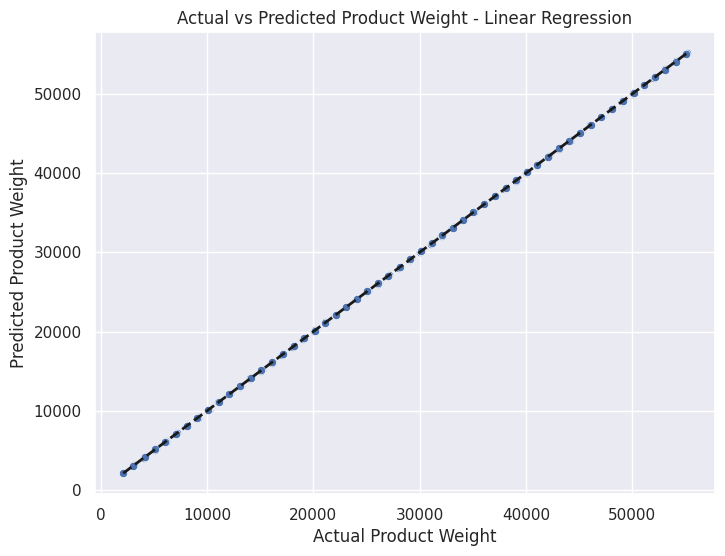

In [ ]:
# Scatter plot for Linear Regression model
scatter_plot('Linear Regression', y_test, linear_reg_predictions)

In [ ]:
# Initialize and train Decision Tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train_scaled, y_train)

# Evaluate Decision Tree model
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
print(f'Decision Tree - MSE: {decision_tree_mse}, R-squared: {decision_tree_r2}')


Decision Tree - MSE: 1.898676293622142, R-squared: 0.9999999858943361


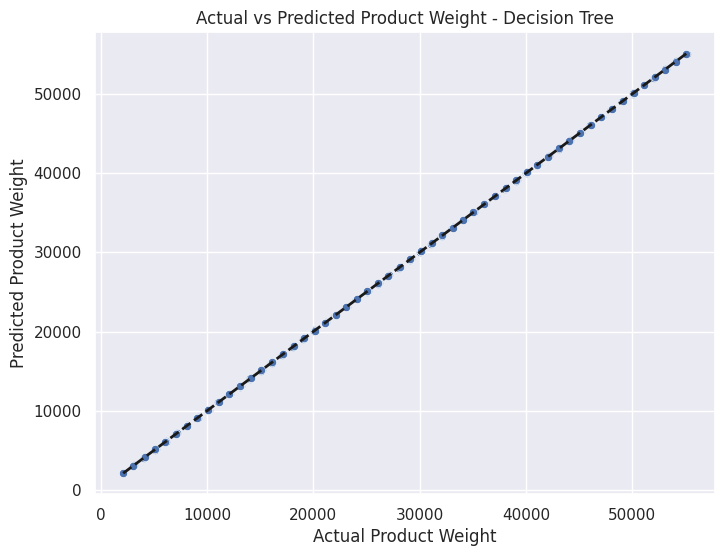

In [ ]:
# Scatter plot for Decision Tree model
scatter_plot('Decision Tree', y_test, decision_tree_predictions)

In [ ]:
# Initialize and train Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train_scaled, y_train)

# Evaluate Random Forest model
random_forest_predictions = random_forest_model.predict(X_test_scaled)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
print(f'Random Forest - MSE: {random_forest_mse}, R-squared: {random_forest_r2}')

Random Forest - MSE: 1.7687022382670843, R-squared: 0.9999999868599406


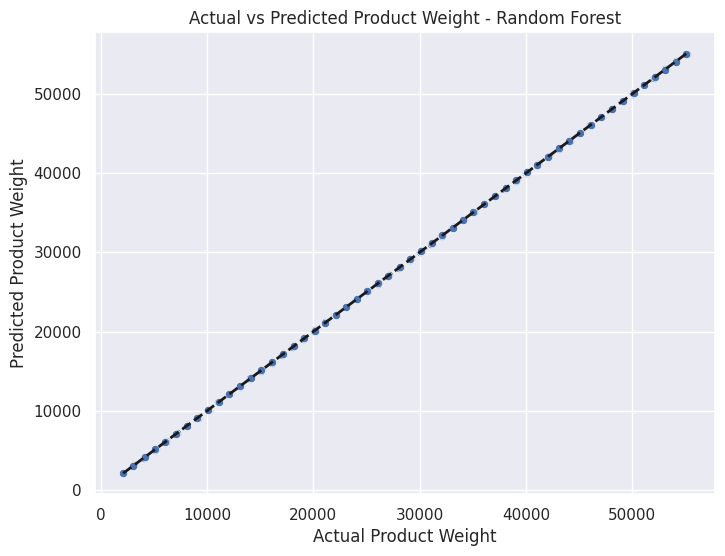

In [ ]:
# Scatter plot for Random Forest model
scatter_plot('Random Forest', y_test, random_forest_predictions)

In [ ]:
# Initialize and train Support Vector Machine (SVR) model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Evaluate SVR model
svr_predictions = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
print(f'SVR - MSE: {svr_mse}, R-squared: {svr_r2}')

SVR - MSE: 127862474.68222551, R-squared: 0.050082893507726434


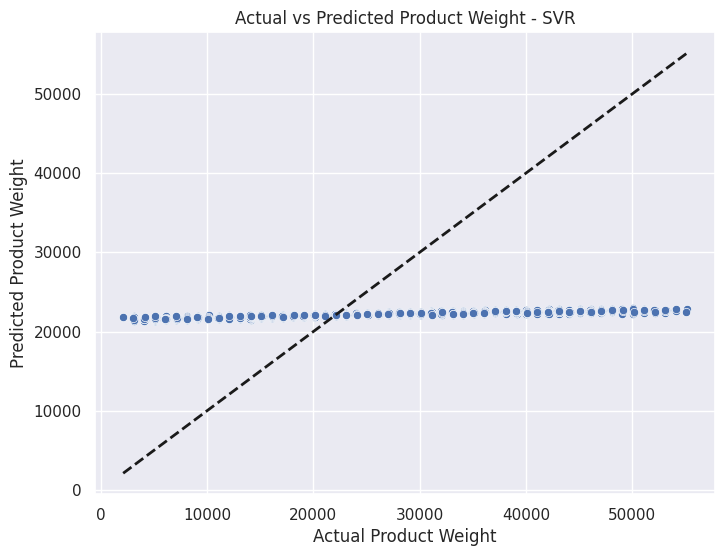

In [ ]:
# Scatter plot for SVR model
scatter_plot('SVR', y_test, svr_predictions)

In [ ]:
# Initialize and train XGBoost model
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train_scaled, y_train)

# Evaluate XGBoost model
xgboost_predictions = xgboost_model.predict(X_test_scaled)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
xgboost_r2 = r2_score(y_test, xgboost_predictions)
print(f'XGBoost - MSE: {xgboost_mse}, R-squared: {xgboost_r2}')

XGBoost - MSE: 30283.55461092163, R-squared: 0.9997750171296012


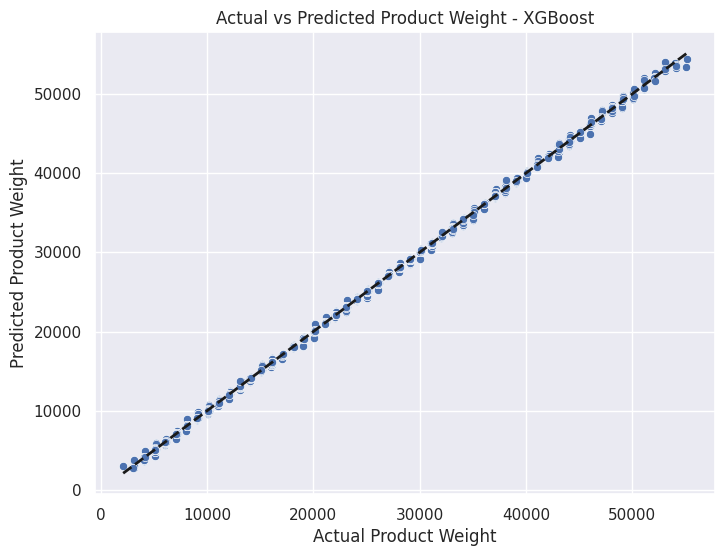

In [ ]:
# Scatter plot for XGBoost model
scatter_plot('XGBoost', y_test, xgboost_predictions)

In [ ]:
# Initialize and train Neural Network model
neural_network_model = MLPRegressor(max_iter=1000)
neural_network_model.fit(X_train_scaled, y_train)

# Evaluate Neural Network model
neural_network_predictions = neural_network_model.predict(X_test_scaled)
neural_network_mse = mean_squared_error(y_test, neural_network_predictions)
neural_network_r2 = r2_score(y_test, neural_network_predictions)
print(f'Neural Network - MSE: {neural_network_mse}, R-squared: {neural_network_r2}')


Neural Network - MSE: 1431.5782533332945, R-squared: 0.9999893645052975


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


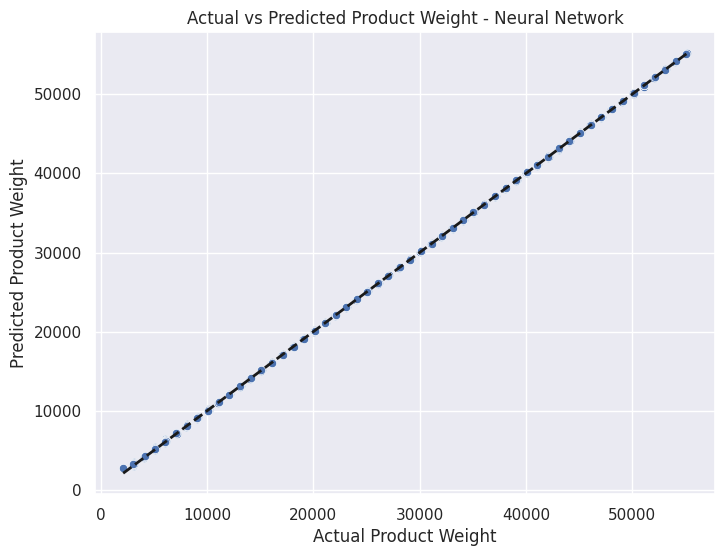

In [ ]:
# Scatter plot for Neural Network model
scatter_plot('Neural Network', y_test, neural_network_predictions)

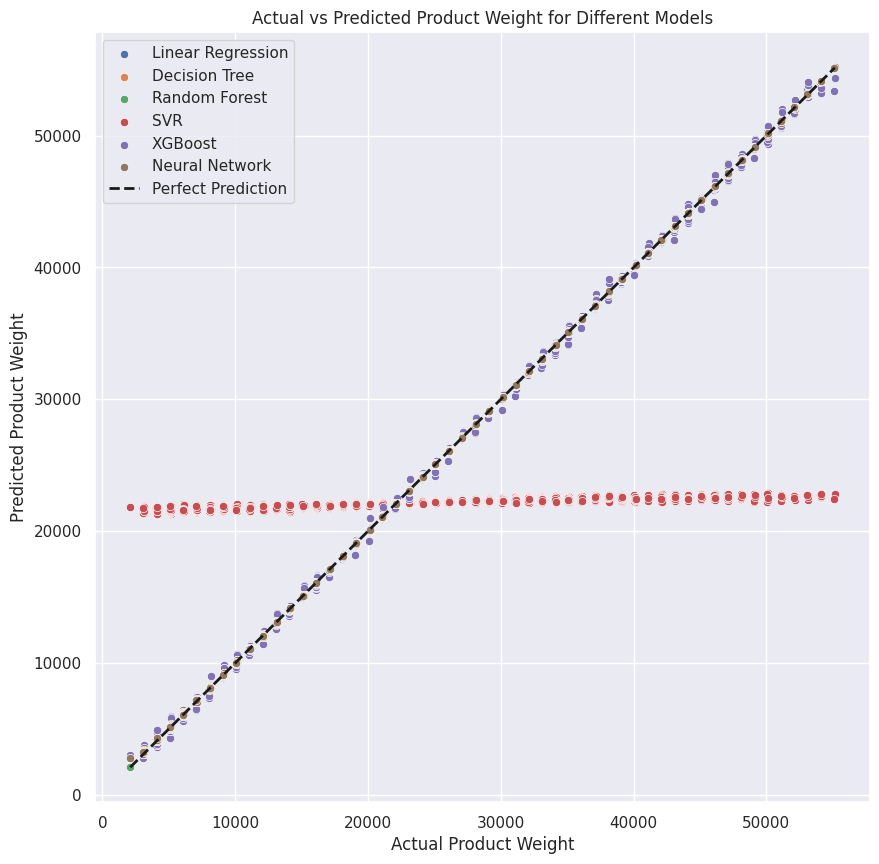

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store actual vs predicted values for each model
results_df = pd.DataFrame({'Actual': y_test, 'Linear Regression': linear_reg_predictions,
                            'Decision Tree': decision_tree_predictions,
                            'Random Forest': random_forest_predictions,
                            'SVR': svr_predictions, 'XGBoost': xgboost_predictions,
                            'Neural Network': neural_network_predictions})

# Scatter plots for each model
plt.figure(figsize=(10, 10))

for model_name in results_df.columns[1:]:
    sns.scatterplot(x='Actual', y=model_name, data=results_df, label=model_name)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Product Weight')
plt.ylabel('Predicted Product Weight')
plt.title('Actual vs Predicted Product Weight for Different Models')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame to store model names and MSE values
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Neural Network'],
    'MSE': [linear_reg_mse, decision_tree_mse, random_forest_mse, svr_mse, xgboost_mse, neural_network_mse]
})

# Find the best model (lowest MSE)
best_model = results_df.loc[results_df['MSE'].idxmin()]

# Display the results
print("Model Comparison:")
print(results_df)

print("\nBest Model:")
print(f"{best_model['Model']} has the lowest Mean Squared Error: {best_model['MSE']}")



Model Comparison:
               Model           MSE
0  Linear Regression  1.016498e-22
1      Decision Tree  1.898676e+00
2      Random Forest  1.768702e+00
3                SVR  1.278625e+08
4            XGBoost  3.028355e+04
5     Neural Network  1.431578e+03

Best Model:
Linear Regression has the lowest Mean Squared Error: 1.016498464614021e-22
